<a href="https://colab.research.google.com/github/ynusinovich/streamflow-prediction/blob/main/Streamflow_prediction_version_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb 
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Freshwater management /HYSETS_combined_and_cleaned_data.csv')#, skiprows= 1, header = 0)
df_shape = df.shape
print(df_shape)

(1554504, 26)


In [3]:
df.sample(10)

,time,watershedID,drainage_area,elevation,slope,discharge,pr,tasmax,tasmin,centroid_lat,...,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Permeability_logk_m2,Porosity_frac,Hydrometric_station_latitude,Hydrometric_station_longitude
209201,2006-10-06,948.0,58.880266,910.689919,1.963300,0.002000,0.000000,16.000000,2.000000,51.71784,...,0.0000,0.0012,0.0335,0.0069,0.9145,0.0,-15.200000,0.190000,51.71784,-113.36110
1416691,1984-09-09,1200.0,926.736911,306.372650,0.438802,0.000000,3.867230,14.491892,8.370946,49.25081,...,0.0014,0.0041,0.0554,0.0030,0.8785,0.0,-13.935689,0.090478,49.25081,-97.54981
736604,1978-09-18,1072.0,625.730462,572.410532,0.326986,0.000000,16.798914,9.053465,1.521875,50.59056,...,0.0036,0.0091,0.0353,0.0000,0.9370,0.0,-16.500000,0.120000,50.59056,-104.90860
1271051,2001-12-13,1156.0,70.419230,601.790911,0.702991,0.001934,0.000000,-8.998638,-18.999395,50.79514,...,0.0331,0.0334,0.0253,0.0068,0.5796,0.0,-16.500000,0.120000,50.79514,-101.29920
681675,1988-04-29,1063.0,256.949954,819.577489,1.346667,0.000000,0.000000,24.658352,5.967462,49.43778,...,0.0076,0.0031,0.0324,0.0000,0.9085,0.0,-16.489764,0.120551,49.43778,-106.83580
699285,2004-07-16,1066.0,462.950299,933.929767,1.212296,0.010000,0.000000,30.746037,14.650216,49.70889,...,0.0109,0.0192,0.0315,0.0000,0.8522,0.0,-13.036298,0.253070,49.70889,-108.12530
927338,1988-11-30,1100.0,84.374739,375.557316,0.333338,0.000000,0.000000,-4.500000,-14.500000,52.79750,...,0.0806,0.0034,0.0362,0.0269,0.6783,0.0,-16.500000,0.120000,52.79750,-102.37060
1358779,1986-02-19,1185.0,347.536242,671.025687,0.673447,0.097521,3.111697,-18.868204,-24.657331,49.58392,...,0.0033,0.0505,0.0263,0.0023,0.6410,0.0,-16.402476,0.124629,49.58392,-101.84820
640593,2003-11-07,1054.0,858.245206,703.033157,1.298255,0.000000,0.000000,-5.614156,-21.434725,50.80167,...,0.0077,0.0237,0.0285,0.0000,0.6050,0.0,-16.418811,0.124372,50.80167,-107.27530
444614,1979-04-16,1025.0,79.149764,844.450784,0.742470,0.080000,1.179323,2.320677,-2.731016,52.78509,...,0.0017,0.0214,0.0459,0.0041,0.8918,0.0,-15.200000,0.190000,52.78509,-113.62910


In [4]:
df

,time,watershedID,drainage_area,elevation,slope,discharge,pr,tasmax,tasmin,centroid_lat,...,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Permeability_logk_m2,Porosity_frac,Hydrometric_station_latitude,Hydrometric_station_longitude
0,1978-01-01,859.0,440.833477,1367.754077,8.435179,0.000,0.000000,-5.432079,-27.493258,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
1,1978-01-02,859.0,440.833477,1367.754077,8.435179,0.000,0.000000,-3.328034,-23.670760,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
2,1978-01-03,859.0,440.833477,1367.754077,8.435179,0.000,10.101207,-12.074663,-22.485310,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
3,1978-01-04,859.0,440.833477,1367.754077,8.435179,0.000,6.966643,-17.925337,-19.597303,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
4,1978-01-05,859.0,440.833477,1367.754077,8.435179,0.000,0.051100,-11.183038,-21.545280,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554499,2009-12-27,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-15.509319,-31.992678,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
1554500,2009-12-28,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-13.991346,-27.980030,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
1554501,2009-12-29,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-13.986687,-26.996006,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
1554502,2009-12-30,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-14.002663,-28.007322,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037


In [5]:
drop_indexes_const_cov = []
drop_indexes_missing_watershed_data = []
drop_indexes_missing_discharge = []
for watershed in set(df["watershedID"]):
    watershed_df = df[df["watershedID"] == watershed]
    if len(set(watershed_df["pr"])) == 1 or len(set(watershed_df["tasmax"])) == 1 or len(set(watershed_df["tasmin"])) == 1:
        drop_indexes_const_cov += list(watershed_df.index)
    if np.isnan(watershed_df["Gravelius"]).all() or np.isnan(watershed_df["Perimeter"]).all() or np.isnan(watershed_df["Permeability_logk_m2"]).all() or np.isnan(watershed_df["Porosity_frac"]).all():
        drop_indexes_missing_watershed_data += list(watershed_df.index)
    if np.isnan(watershed_df["discharge"]).all():
        drop_indexes_missing_discharge += list(watershed_df.index)
        
print(len(drop_indexes_const_cov)/len(df)*100)
print(len(drop_indexes_missing_watershed_data)/len(df)*100)
print(len(drop_indexes_missing_discharge)/len(df)*100)

drop_indexes = list(set(drop_indexes_const_cov + drop_indexes_missing_watershed_data + drop_indexes_missing_discharge))
df.drop(index = drop_indexes, inplace = True)
df

0.0
0.0
0.0


,time,watershedID,drainage_area,elevation,slope,discharge,pr,tasmax,tasmin,centroid_lat,...,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Permeability_logk_m2,Porosity_frac,Hydrometric_station_latitude,Hydrometric_station_longitude
0,1978-01-01,859.0,440.833477,1367.754077,8.435179,0.000,0.000000,-5.432079,-27.493258,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
1,1978-01-02,859.0,440.833477,1367.754077,8.435179,0.000,0.000000,-3.328034,-23.670760,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
2,1978-01-03,859.0,440.833477,1367.754077,8.435179,0.000,10.101207,-12.074663,-22.485310,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
3,1978-01-04,859.0,440.833477,1367.754077,8.435179,0.000,6.966643,-17.925337,-19.597303,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
4,1978-01-05,859.0,440.833477,1367.754077,8.435179,0.000,0.051100,-11.183038,-21.545280,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554499,2009-12-27,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-15.509319,-31.992678,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
1554500,2009-12-28,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-13.991346,-27.980030,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
1554501,2009-12-29,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-13.986687,-26.996006,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
1554502,2009-12-30,2370.0,497.006132,888.509557,1.735527,0.001,0.000000,-14.002663,-28.007322,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037


In [6]:
df.describe()

,watershedID,drainage_area,elevation,slope,discharge,pr,tasmax,tasmin,centroid_lat,centroid_lon,...,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Permeability_logk_m2,Porosity_frac,Hydrometric_station_latitude,Hydrometric_station_longitude
count,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,...,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06,1.554504e+06
mean,1.105233e+03,1.597801e+03,6.777292e+02,1.338422e+00,1.905156e+00,1.239367e+00,8.688764e+00,-3.456000e+00,5.148891e+01,-1.061664e+02,...,2.588195e-02,2.626391e-02,2.944436e-02,1.641203e-02,5.966008e-01,4.285714e-05,-1.563368e+01,1.402122e-01,5.148891e+01,-1.061664e+02
std,2.413765e+02,5.158201e+03,2.526692e+02,2.191045e+00,1.148876e+01,3.719705e+00,1.402951e+01,1.259672e+01,1.487234e+00,5.259896e+00,...,5.577869e-02,2.559428e-02,1.658715e-02,2.466528e-02,3.072894e-01,4.923912e-04,1.112611e+00,3.873733e-02,1.487234e+00,5.259896e+00
min,8.590000e+02,9.164966e+00,2.506266e+02,1.928471e-01,0.000000e+00,0.000000e+00,-3.800000e+01,-5.000000e+01,4.900040e+01,-1.138394e+02,...,0.000000e+00,0.000000e+00,5.000000e-04,0.000000e+00,0.000000e+00,0.000000e+00,-1.650000e+01,1.266684e-02,4.900040e+01,-1.138394e+02
25%,1.016000e+03,2.190513e+02,5.199054e+02,5.385032e-01,0.000000e+00,0.000000e+00,-1.236504e+00,-1.143296e+01,5.025306e+01,-1.109211e+02,...,1.800000e-03,7.200000e-03,1.880000e-02,1.800000e-03,3.217000e-01,0.000000e+00,-1.650000e+01,1.200000e-01,5.025306e+01,-1.109211e+02
50%,1.075000e+03,4.451031e+02,6.257396e+02,9.305735e-01,1.000000e-02,0.000000e+00,1.000000e+01,-1.475957e+00,5.156666e+01,-1.060292e+02,...,7.000000e-03,1.890000e-02,2.990000e-02,6.500000e-03,6.803000e-01,0.000000e+00,-1.613715e+01,1.203020e-01,5.156666e+01,-1.060292e+02
75%,1.139000e+03,1.065596e+03,8.014372e+02,1.342965e+00,3.015702e-01,6.916283e-01,2.050000e+01,6.705170e+00,5.279750e+01,-1.017190e+02,...,2.900000e-02,3.700000e-02,3.600000e-02,2.150000e-02,8.756000e-01,0.000000e+00,-1.520000e+01,1.623720e-01,5.279750e+01,-1.017190e+02
max,2.370000e+03,5.505924e+04,1.838081e+03,2.256127e+01,8.990000e+02,1.412000e+02,4.282429e+01,2.850000e+01,5.395278e+01,-9.704417e+01,...,4.430000e-01,1.515000e-01,1.022000e-01,1.510000e-01,9.594000e-01,5.700000e-03,-1.175714e+01,2.555102e-01,5.395278e+01,-9.704417e+01


In [7]:
# 1) Create a dictionary to store key-value pairs.
missing = {}
# 2) Create the variable that represents each unique watershed
uni = df.watershedID.unique()
#3) Create a loop that will iterate over watersheds, assigning missing discharge sums to a watershed, and stores both in a dictionary. 
for i in uni: 
  shed = df[(df.watershedID == i)]
  nums = shed.discharge.isnull().sum()
  missing[nums] = i
# What is the most populous discharge value'd watershed?
sorted(missing.items())[0:10] 

[(0, 2370.0)]

In [8]:
# This model will focus on watershed 859 
shed859 = df[(df.watershedID == 859)]
# Switching the 'time' column to the datetime format.
shed859["time"] = pd.to_datetime(shed859["time"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
# For ease of experimentation between watersheds, a copy will be made. 
copy = shed859.copy()

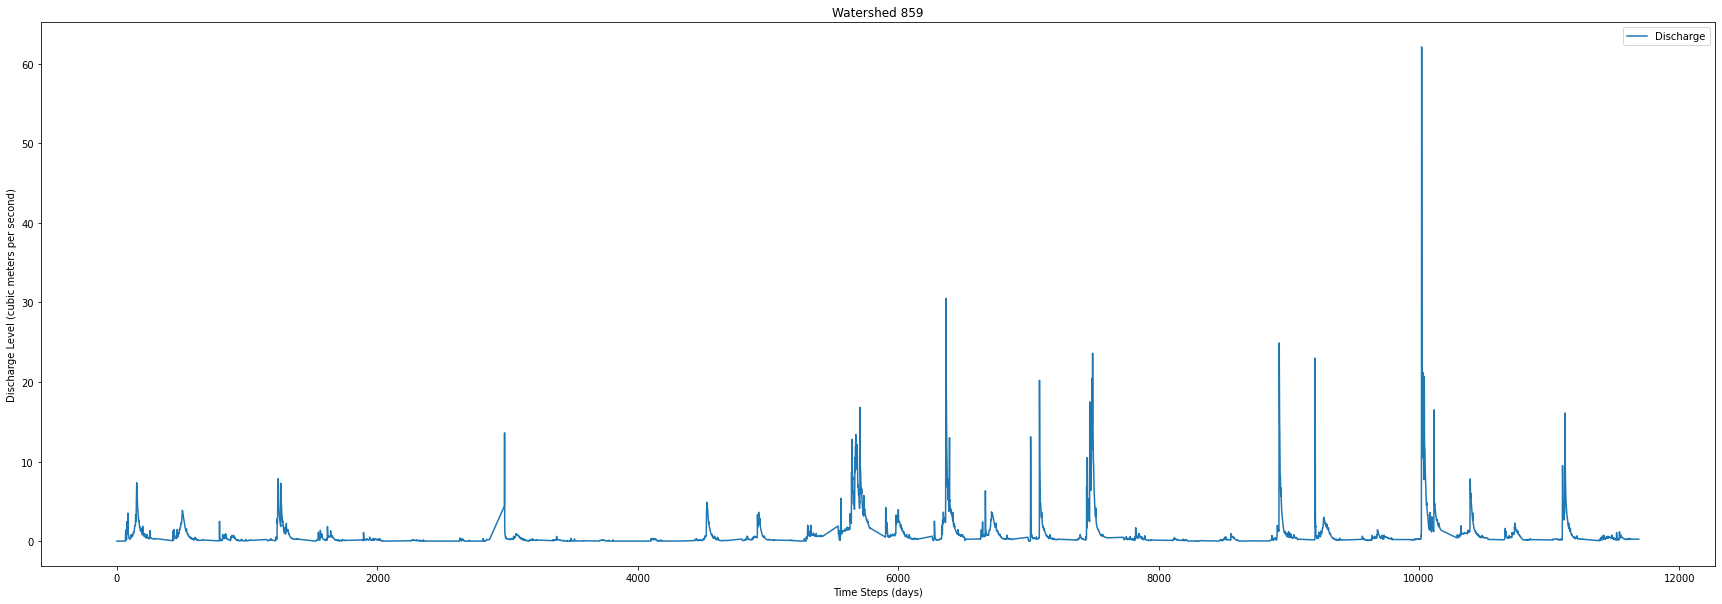

In [10]:
# For visual representation, plotting discharge of watershed 214

x = range(len(copy))
y1 = copy.discharge

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.title("Watershed 859")
plt.xlabel("Time Steps (days)") # A track varies in timing, but averages to every 3 days.
plt.ylabel("Discharge Level (cubic meters per second)")
plt.plot(y1, label = 'Discharge')


plt.legend()
plt.show()

In [11]:
# Cumulative rainfall from the past ten days could be useful information for the model. 
# Create a list to store 10-day rainfall values
rainfall = []
# Create a loop to iterate though dataframe. 
for i in range(len(copy.pr)): 
  # Start at the tenth value. 
  if i < 10:
    rain = copy.pr[:i].sum()
  elif i >= 10:
    rain = copy.pr[i-10:i].sum()
  rainfall.append(rain)
print("Length:", len(rainfall), "First ten values:", rainfall[0:10])

Length: 11688 First ten values: [0.0, 0.0, 0.0, 10.101207, 17.06785, 17.11895007, 18.69936177, 18.92193097, 25.268985469999997, 25.268985469999997]


In [14]:
copy['10_day_rain'] = rainfall

In [32]:
# Cumulative max temp from the past ten days could be useful information for the model. 
# Create a list to store 10-day max temp values

# Create a loop to iterate though dataframe. 
maxtemperature = []
for i in range(len(copy.tasmax)): 
  # Start at the tenth value. 
  if i < 10:
    temp = copy.tasmax[:i].sum()
  elif i >= 10:
    temp = copy.tasmax[i-10:i].sum()
  maxtemperature.append(temp)
print("Length:", len(maxtemperature), "First ten values:", maxtemperature[0:10])

Length: 11688 First ten values: [0.0, -5.4320793, -8.7601135, -20.834776499999997, -38.760113499999996, -49.9431515, -61.4395325, -82.8875095, -100.4995035, -114.0087305]


In [24]:
# Instantiate the model.
reg = xgb.XGBRegressor(n_estimators=500, learning_rate=0.01)

In [25]:
# Create the predictor and target variables. 
num = 31
predict = copy.iloc[num-31:num-1] # As we will be predicting the final year, this does not need to be modified to num+1
target = copy.discharge.iloc[num-30:num]
print("The first predictors will be:\n", predict.iloc[0],"\n \nAnd the first target will be:", target.iloc[0])

The first predictors will be:
 time                             1978-01-01 00:00:00
watershedID                                    859.0
drainage_area                             440.833477
elevation                                1367.754077
slope                                       8.435179
discharge                                        0.0
pr                                               0.0
tasmax                                     -5.432079
tasmin                                    -27.493258
centroid_lat                                49.97735
centroid_lon                                -113.686
Gravelius                                     1.3071
Perimeter                                     96.708
Aspect_deg                                  108.0403
Land_Use_Forest_frac                          0.3399
Land_Use_Grass_frac                           0.5051
Land_Use_Wetland_frac                         0.0106
Land_Use_Water_frac                           0.0001
Land_Use_Urban_